Chessboard found!


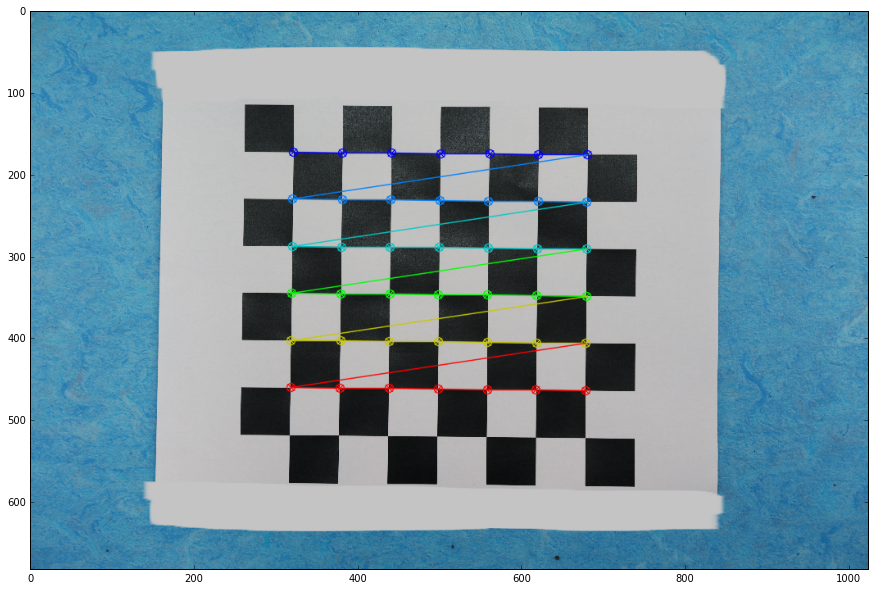

Chessboard found!


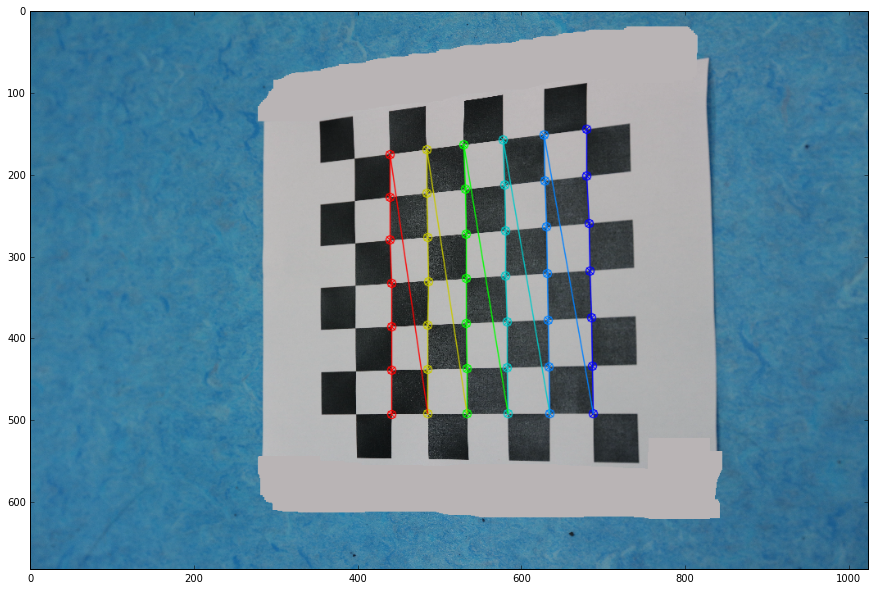

In [11]:
import numpy as np
import cv2
import glob

from matplotlib import pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 10)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

conres_in = 7
conres_in2 = 7

objp = np.zeros((conres_in*conres_in2,3), np.float32)
objp[:,:2] = np.mgrid[0:conres_in,0:conres_in2].T.reshape(-1,2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('../data/*.JPG')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    if gray.shape[1] > 1024:
        dsize = (1024, int(gray.shape[0] / (img.shape[1] / float(1024))))
        gray = cv2.resize(gray, dsize)
        img = cv2.resize(img, dsize)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (conres_in,conres_in2), None, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK)

    # If found, add object points, image points (after refining them)
    if ret == True:
        print("Chessboard found!")
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        plt.imshow(img)
        plt.show()




# Calibration

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

# Undistortion

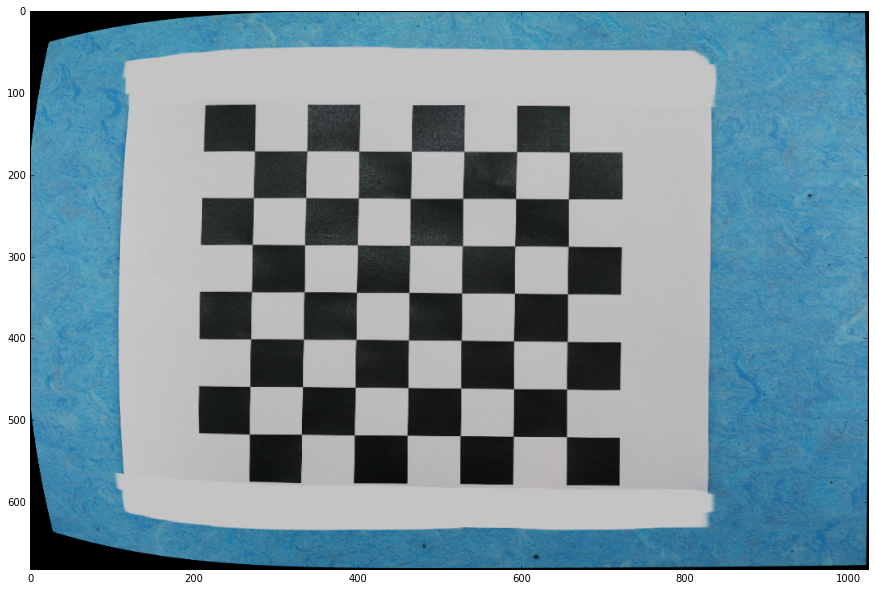

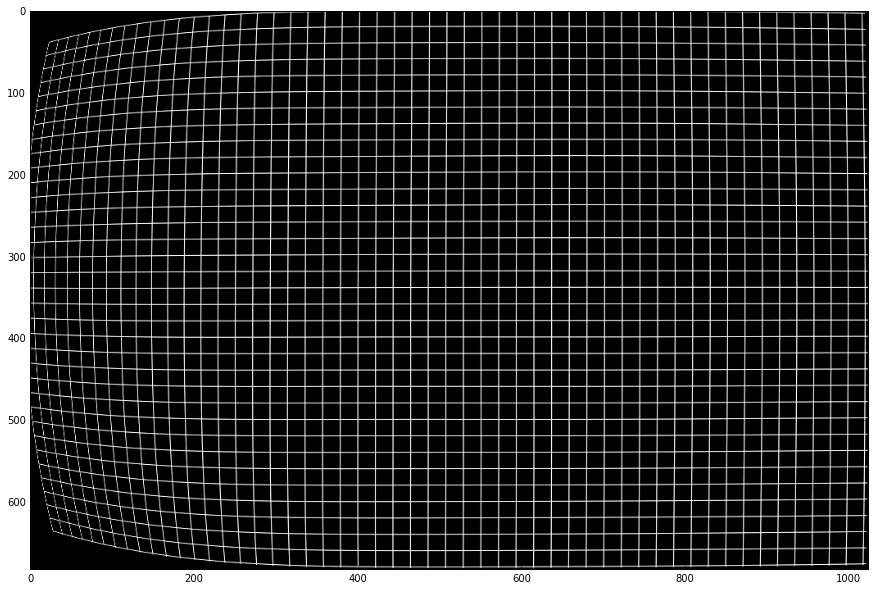

In [10]:
img = cv2.imread(images[0])
if img.shape[1] > 1024:
    dsize = (1024, int(img.shape[0] / (img.shape[1] / float(1024))))
    img = cv2.resize(img, dsize)
    
h,  w = img.shape[:2]
grid_img = np.zeros( (h, w), np.uint8 )

for x in range(0, w, 20):
    cv2.line(grid_img, (x, 0), (x, h), (255, 0, 0) )
for y in range(0, h, 20):
    cv2.line(grid_img, (0, y), (w, y), (255, 0, 0) )



newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
dstg = cv2.undistort(grid_img, mtx, dist, None, newcameramtx)

plt.rcParams['figure.figsize'] = (16, 10)

plt.imshow(dst)
plt.show()

plt.imshow(dstg, cmap='Greys_r')
plt.show()

